<a href="https://colab.research.google.com/github/Azimoj/WCS/blob/main/Project_Redline_01_Hypothesis_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Set - Find the data here. https://raw.githubusercontent.com/jslhost/dataset_repo/main/insurance_claims.csv

* **Age** :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
* **Sex** :- This is the policy holder's gender, either male or female.
* **BMI** :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
* **Children** :- This is an integer indicating the number of children / dependents covered by the insurance plan.
* **Smoker** :- This is yes or no depending on whether the insured regularly smokes tobacco.
* **Region** :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
* **Charges**​ :- Individual medical costs billed to health insurance

**Mission**
* Prove (or disprove) that the medical claims made by the people who smoke are greater than those who don't?
* Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
* Is the proportion of smokers significantly different across different regions?
* Is the mean BMI of women with no children, one child, and two children the same?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import plotly.io as pio

from google.colab import files

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2
from statsmodels.stats import weightstats as stests
from statsmodels.stats.weightstats import ztest

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Package kaleido à installer pour exporter des figures plotly express en fichier image
# A ne faire qu'une seule fois
# Puis, il faut redémarrer l'environnement de travail
#!pip install -U kaleido

## Data

In [2]:
# DataFrame with initial data
data = pd.read_csv("https://raw.githubusercontent.com/jslhost/dataset_repo/main/insurance_claims.csv")
df_init= data.copy()
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df_init.sample(5)

,age,sex,bmi,children,smoker,region,charges
649,58,female,32.965,0,no,northeast,12430.95335
244,63,female,27.740,0,yes,northeast,29523.16560
68,40,female,36.190,0,no,southeast,5920.10410
1328,23,female,24.225,2,no,northeast,22395.74424
102,18,female,30.115,0,no,northeast,21344.84670


In [20]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Âge      1338 non-null   int64  
 1   sex      1338 non-null   object 
 2   Imc      1338 non-null   float64
 3   Enfants  1338 non-null   int64  
 4   smoker   1338 non-null   object 
 5   region   1338 non-null   object 
 6   Coûts    1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df_init.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data modification  
To translate some columns to French.

In [3]:
df_init = df_init.rename(columns = {'charges': 'Coûts',
                                     'children' : "Enfants",
                                     'bmi' : "Imc",
                                     'age' : "Âge"})

In [4]:
# Creation of new DataFrame df_modif
df_modif = df_init.copy()

# Add new columns with data in French language
# 'Genre' column
df_modif['Genre'] = df_modif.sex.apply(
    lambda s: 'masculin' if s == 'male' else
     ('féminin' if s == 'female' else s))
# 'Fumeur' column
df_modif['Fumeur'] = df_modif.smoker.apply(
    lambda f: 'oui' if f == 'yes' else
     ('non' if f == 'no' else f))

# 'region' column
df_modif['Région'] = df_modif.region.apply(
    lambda r: 'sud-ouest' if r == 'southwest' else
     'sud-est' if r == 'southeast' else
      'nord-ouest' if r == 'northwest' else
       'nord-est' if r == 'northeast' else r)

df_modif.head()

,Âge,sex,Imc,Enfants,smoker,region,Coûts,Genre,Fumeur,Région
0,19,female,27.900,0,yes,southwest,16884.92400,féminin,oui,sud-ouest
1,18,male,33.770,1,no,southeast,1725.55230,masculin,non,sud-est
2,28,male,33.000,3,no,southeast,4449.46200,masculin,non,sud-est
3,33,male,22.705,0,no,northwest,21984.47061,masculin,non,nord-ouest
4,32,male,28.880,0,no,northwest,3866.85520,masculin,non,nord-ouest


In [8]:
df_init.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Data Exploration

https://www.analyticsvidhya.com/blog/2021/04/exploratory-analysis-using-univariate-bivariate-and-multivariate-analysis-techniques/

#### <font color='orange'>**Analyse Univariée**</font>

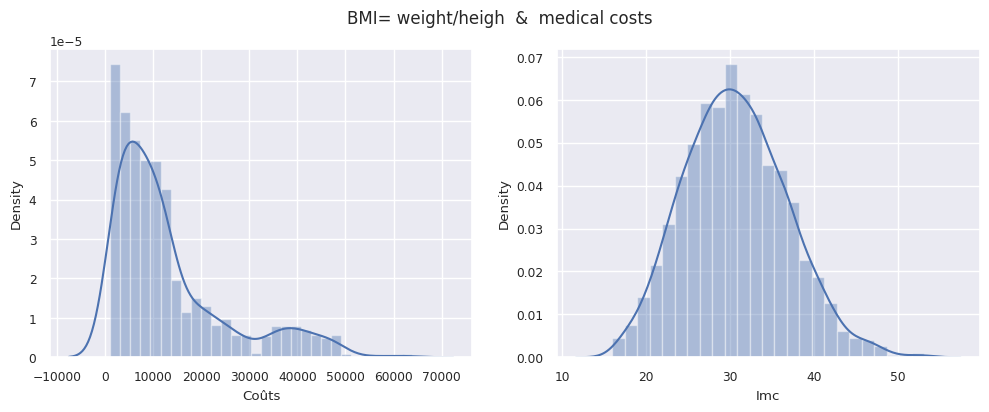

In [37]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df_modif["Coûts"])

plt.subplot(1,2,2)
sns.distplot(df_modif["Imc"])

plt.suptitle("BMI= weight/heigh  &  medical costs", fontsize=12)
plt.show()

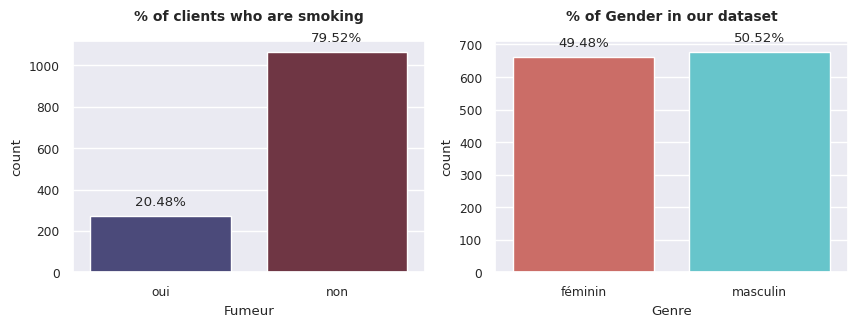

In [26]:
sns.set(font_scale=0.8)
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
ax1= sns.countplot(x="Fumeur", data=df_modif, palette="icefire")
total1 = len(df_modif['Fumeur'])

for p in ax1.patches:
    ax1.annotate('{:.2f}%'.format(100 * p.get_height()/total1), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("% of clients who are smoking", fontsize=10 ,  pad=15, fontweight="bold")

plt.subplot(1,2,2)
ax2= sns.countplot(x="Genre", data=df_modif, palette="hls")
total2 = len(df_modif['Genre'])

for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total2), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("% of Gender in our dataset", fontsize=10,  pad=15, fontweight="bold")

plt.show()

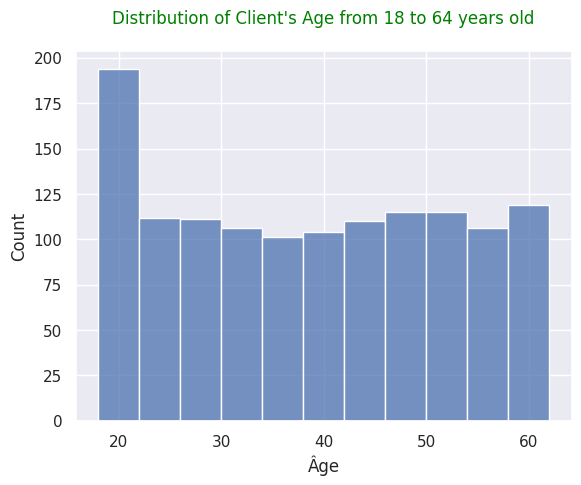

In [25]:
sns.histplot(data=df_modif, x="Âge", bins = list(range(18, 64, 4)))
plt.title("Distribution of Client's Age from 18 to 64 years old", color='green', pad=20)
sns.set(font_scale=1.1)

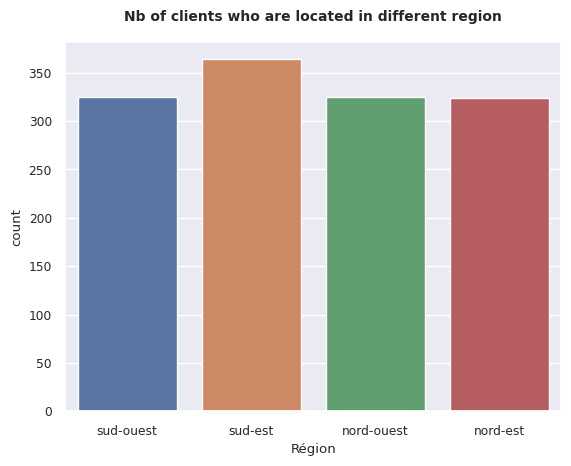

In [31]:
sns.countplot(data= df_modif, x = 'Région')
plt.title("Nb of clients who are located in different region", fontsize=10,  pad=15, fontweight="bold")
plt.show()

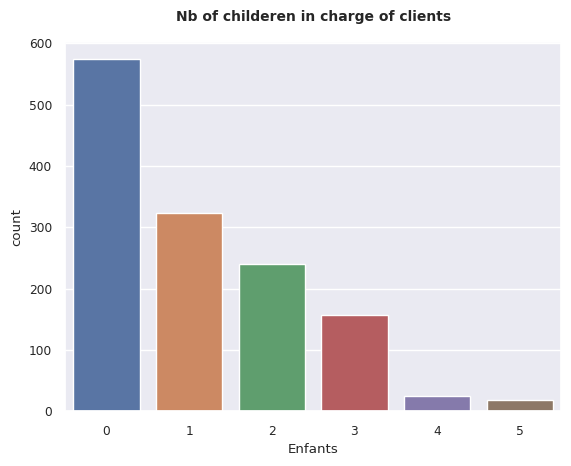

In [29]:
sns.countplot(data= df_modif, x = 'Enfants')
plt.title("Nb of childeren in charge of clients", fontsize=10,  pad=15, fontweight="bold")
plt.show()

#### <font color='orange'>**Analyse bivariable**</font>

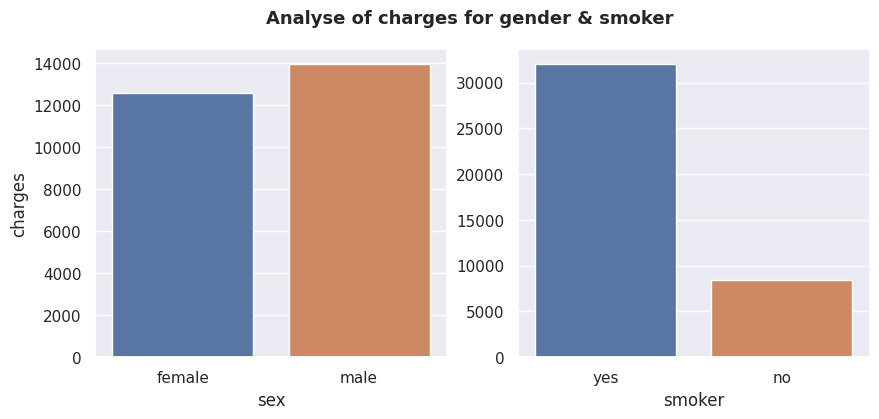

In [23]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(10,4))
sns.barplot(x='sex',y='charges',data=data, ax=axes[0],errorbar=None)
sns.barplot(x='smoker',y='charges',data=data, ax=axes[1], errorbar=None)

plt.ylabel('')
plt.suptitle("Analyse of charges for gender & smoker", fontsize=13, fontweight="bold")
plt.show()

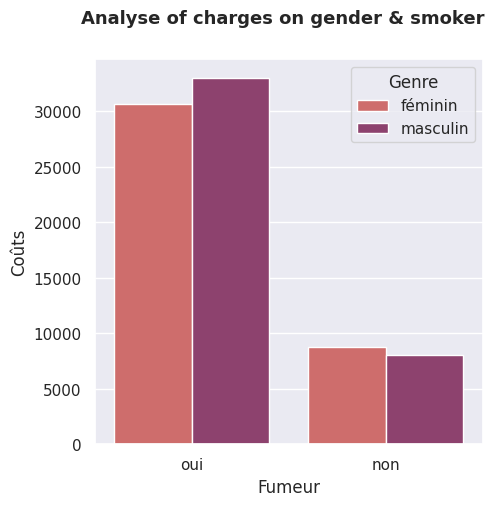

In [24]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(  figsize=(5,5))

sns.barplot(x='Fumeur',y='Coûts',data=df_modif,hue="Genre",errorbar=None, palette="flare")
plt.suptitle("Analyse of charges on gender & smoker", fontsize=13, fontweight="bold")

plt.show()

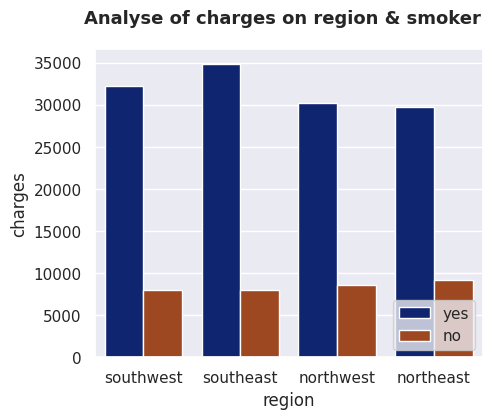

In [39]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(  figsize=(5,4))

sns.barplot(x='region',y='charges',data=data,hue="smoker",errorbar=None, palette="dark", )
plt.suptitle("Analyse of charges on region & smoker", fontsize=13, fontweight="bold")
plt.legend(loc='lower right')
plt.show()

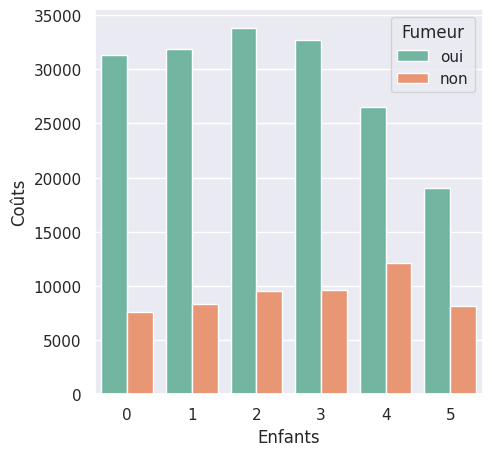

In [15]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(  figsize=(5,5))

sns.barplot(x='Enfants',y='Coûts',data=df_modif,errorbar=None, hue= "Fumeur",palette="Set2")
# plt.suptitle("Analyse of charges on gender & smoker", fontsize=13, fontweight="bold")

plt.show()

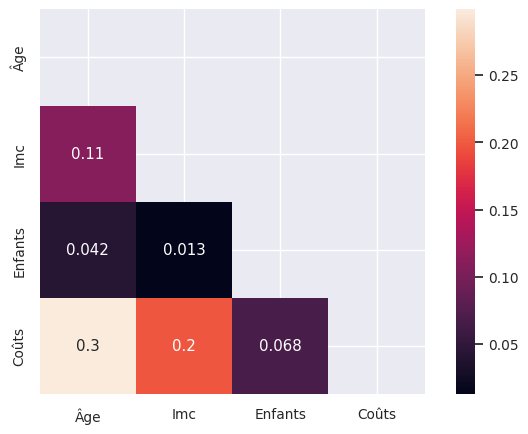

In [16]:
sns.set(font_scale=.9)
corr_matrix = df_modif.corr()
fig = plt.figure(1, figsize=(8, 5))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True, annot=True)
#plt.title("Corrolation entre les variabes numeriques ", pad=20,fontweight="bold")

plt.show()

In [17]:
df_modif.columns

Index(['Âge', 'sex', 'Imc', 'Enfants', 'smoker', 'region', 'Coûts', 'Genre',
       'Fumeur', 'Région'],
      dtype='object')

In [18]:
df_smoker = df_modif.loc[df_modif['Fumeur'] == 'oui']
df_no_smoker = df_modif.loc[df_modif['Fumeur']== 'non']

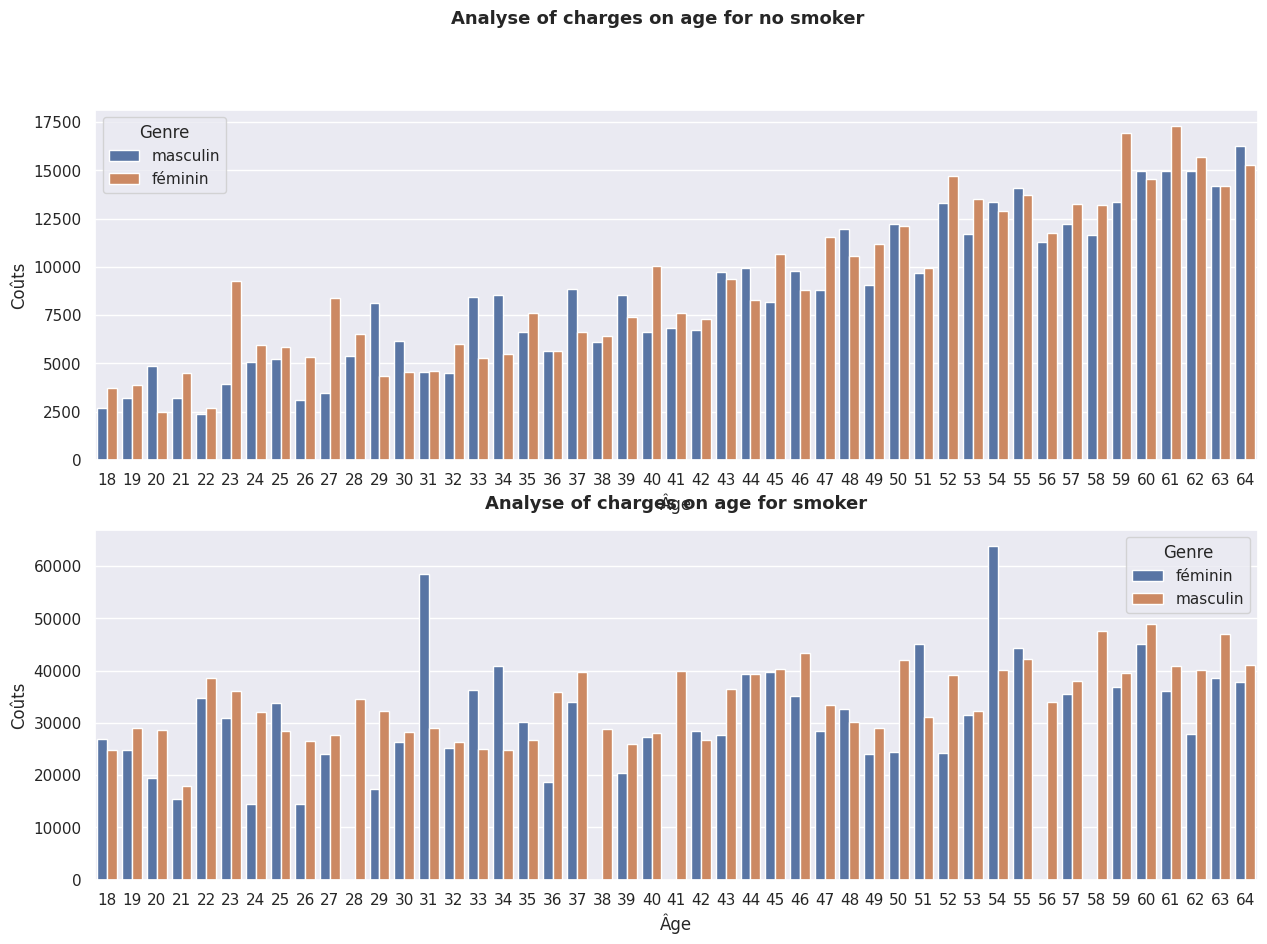

In [19]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=2, ncols=1,  figsize=(15,10))

sns.barplot(x='Âge',y='Coûts',data=df_no_smoker, ax=axes[0],hue="Genre",errorbar=None)
plt.xlabel("")
plt.suptitle("Analyse of charges on age for no smoker", fontsize=13,fontweight="bold")


sns.barplot(x='Âge',y='Coûts',data=df_smoker, ax=axes[-1],hue="Genre",errorbar=None)
plt.title("Analyse of charges on age for smoker", fontsize=13,pad=15, fontweight="bold")



plt.show()

# Missions

### 1 - Charges (claims) difference between smokers and non-smokers

### 1.1 - Z-test

In [ ]:
# New dfs with specific useful data
df_smoker = df_init[df_init.smoker == 'yes']['charges']
df_no_smoker = df_init[df_init.smoker == 'no']['charges']

# Display statistical information
# Mean
print(f"- Average charges of smokers charges = {round(df_smoker.mean())}")
print(f"- Average charges of non-smokers charges = " +
 f"{round(df_no_smoker.mean())}\n")

# Standard deviation
print(f"- Standard deviation of smokers charges = {round(df_smoker.std())}")
print(f"- Standard deviation of non-smokers charges = " +
 f"{round(df_no_smoker.std())}\n")

# Perform Z-test to compare means of 2 populations
ztest, pval = stests.ztest(x1=df_smoker, x2=df_no_smoker,
                           value=0, alternative='larger')

print(f"p-value = {pval}")
if pval < 0.05:
  print("Null Hypothesis rejected. \n" +
        "Populations of smokers and non-smokers have charges which are " +
        "significantly different.")
else:
  print("Null Hypothesis failed to be rejected \n" +
        "We cannot conclude that populations of smokers and non-smokers have " +
        "charges which are significantly different.")

- Average charges of smokers charges = 32050
- Average charges of non-smokers charges = 8434

- Standard deviation of smokers charges = 11542
- Standard deviation of non-smokers charges = 5994

p-value = 0.0
Null Hypothesis rejected. 
Populations of smokers and non-smokers have charges which are significantly different.


### 1.2 - T-test

In [ ]:
# Group by 'smoker' and calculate the average charges
avg_charges = df_init.groupby('smoker')['charges'].mean()
print (avg_charges)
print()

# Split the data into two groups: smokers and non-smokers
smokers_charges = df_init[df_init['smoker'] == 'yes']['charges']
non_smokers_charges = df_init[df_init['smoker'] == 'no']['charges']
#print(smokers_charges)
#print(non_smokers_charges)
#print()

# Perform an independent t-test
t_stat, p_value = ttest_ind(smokers_charges, non_smokers_charges)

print("Average Medical Claims:")
print(avg_charges)
print("\nT-test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Average Medical Claims:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

T-test Results:
t-statistic: 46.66492117272371
p-value: 8.271435842179102e-283


La p value est très inférieure au seuil alpha de 0.025, on peut donc rejeter l'hypothèse null ("il n'y a pas de différence significative entre fumeurs et non fumeurs en matière de couts de santé"). En d'autres termes, les fumeurs ont plus de dépenses de santé que les non-fumeurs.


### 1.3 - Boxplot charges for smokers / non-smokers

In [ ]:
# All information is displayed in French for the presentation

# Définition de la figure, ici un boxplot
fig_1 = px.box(data_frame=df_modif, color='Fumeur', y='charges',
               #title = "Coûts médicaux des fumeurs et non fumeurs",
               color_discrete_sequence =['indianred', 'limegreen'],)

# Mise en forme du layout
fig_1.update_layout(
    plot_bgcolor='ghostwhite', # nom de couleur (CSS name) pour le fond du graphique
    paper_bgcolor = 'white', # nom de couleur (CSS name) pour le papier (arrière-plan)
    title={'x':0.5, 'xanchor': 'center', # Centrage horizontal du titre
           'y': 0.9, 'yanchor': 'top', # aligmenent vertical du titre
           },
    legend={'title':{'text':'Fumeur', # Personnalise le titre de la légende
                     'font': {'size': 24}}, # Ajuste taille titre de la légende
            'font': {'size': 20},
            'x':0.5,
            'xanchor': 'center',
            'y':-0.13,
            'yanchor': 'bottom',
            'orientation': 'h'}, # Ajuste taille étiquettes de la légende
    width = 800, # ajustement de la largeur de la figure
    margin={'l':20, 'r':10}, # ajustement des marges,
    boxgap=0.2, # écart autour des boîtes
    boxgroupgap = 0.2, # écart entre boîtes du même groupe
    )

# Mise en forme des axes
fig_1.update_xaxes(showgrid=True, linewidth=2, linecolor='black')
fig_1.update_yaxes(showgrid=True, linewidth=2, linecolor='black', gridwidth=1,
                   gridcolor='LightGrey', griddash='dash',
                   title_text='Coûts',  # Personnalise le titre de l'axe
                   title_font=dict(size=24),  # Ajuste taille du titre de l'axe
                   tickfont=dict(size=20),  # Ajuste taille étiquettes de l'axe
                   )

# Affichage de la figure
fig_1.show()

#### Graph export

In [ ]:
# Export de la figure en image png
fig_1.write_image('boxplot_charges_smokers.png')

# Téléchargement de l'image
files.download('boxplot_charges_smokers.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2 - BMI difference between males and females

### 2.1 - Z-test

In [ ]:
# New dfs with specific useful data (bmi according to sex)
df_males_bmi = df_init[df_init.sex == 'male']['bmi']
df_females_bmi = df_init[df_init.sex == 'female']['bmi']

# Display statistical information
# Mean
print(f"- Average BMI of males = {round(df_males_bmi.mean())}")
print(f"- Average BMI of females = {round(df_females_bmi.mean())}\n")

# Standard deviation
print(f"- Standard deviation of males BMI = {round(df_males_bmi.std())}")
print(f"- Standard deviation of femmales BMI = {round(df_females_bmi.std())}\n")

# Perform Z-test to compare means of 2 populations
ztest_2, pval_2 = stests.ztest(x1=df_females_bmi, x2=df_males_bmi,
                           value=0, alternative='two-sided')

print(f"p-value = {pval_2}")
if pval_2 < 0.05:
  print("Null Hypothesis rejected. \n" +
        "BMI of females and males are significantly different.")
else:
  print("Null Hypothesis failed to be rejected \n" +
        "We cannot conclude that BMI of females and males are significantly " +
        "different.")

- Average BMI of males = 31
- Average BMI of females = 30

- Standard deviation of males BMI = 6
- Standard deviation of femmales BMI = 6

p-value = 0.08974343679943912
Null Hypothesis failed to be rejected 
We cannot conclude that BMI of females and males are significantly different.


### 2.2 - T-test


In [ ]:
# New dfs with specific useful data (bmi according to sex)
male_bmi = df_init[df_init['sex'] == 'male']['bmi']
female_bmi = df_init[df_init['sex'] == 'female']['bmi']

# Perform T-test
t_stat_bmi, p_value_bmi = ttest_ind(male_bmi, female_bmi)
print("t_stat_bmi:", t_stat_bmi)
print("p_value_bmi:", p_value_bmi)
print()

t_stat_bmi: 1.696752635752224
p_value_bmi: 0.08997637178984932



### 2.3 - Boxplot BMI for males and females

In [ ]:
# Définition de la figure, ici un boxplot
fig_2 = px.box(data_frame=df_modif, color='Genre', y='bmi',
             #title = "BMI for males and females",
             color_discrete_sequence =['indianred', 'limegreen'],)

# Mise en forme du layout
fig_2.update_layout(
    plot_bgcolor='ghostwhite', # nom de couleur (CSS name) pour le fond du graphique
    paper_bgcolor = 'white', # nom de couleur (CSS name) pour le papier (arrière-plan)
    #paper_bgcolor = 'aliceblue', # nom de couleur (CSS name) pour le papier (arrière-plan)
    title={'x':0.5, 'xanchor': 'center', # Centrage horizontal du titre
           'y': 0.9, 'yanchor': 'top', # aligmenent vertical du titre
           },
    legend={'title':{'text':'Genre', # Personnalise le titre de la légende
                     'font': {'size': 24}}, # Ajuste taille titre de la légende
            'font': {'size': 20},
            'x':0.5,
            'xanchor': 'center',
            'y':-0.13,
            'yanchor': 'bottom',
            'orientation': 'h'}, # Ajuste taille étiquettes de la légende
    width = 800, # ajustement de la largeur de la figure
    margin={'l':20, 'r':10}, # ajustement des marges,
    boxgap=0.2, # écart autour des boîtes
    boxgroupgap = 0.2, # écart entre boîtes du même groupe
    )

# Mise en forme des axes
fig_2.update_xaxes(showgrid=True, linewidth=2, linecolor='black')
fig_2.update_yaxes(showgrid=True, linewidth=2, linecolor='black', gridwidth=1,
                   gridcolor='LightGrey', griddash='dash',
                   title_text='IMC',  # Personnalise le titre de l'axe
                   title_font=dict(size=24),  # Ajuste taille du titre de l'axe
                   tickfont=dict(size=20),  # Ajuste taille étiquettes de l'axe
                   )

# Affichage de la figure
fig_2.show()

In [ ]:
# Export de la figure en image png
fig_2.write_image('boxplot_bmi_males_females.png')

# Téléchargement de l'image
files.download('boxplot_bmi_males_females.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3 - Region and smokers

In [ ]:
# contingency table (tableau croisé)
contingency_table_2 = pd.crosstab(index=df_init.smoker, columns=df_init.region)
print("- contingency_table (cross tab): \n ", contingency_table_2)

# Observed Values
Observed_Values = contingency_table_2.values
print("\n- Observed Values: \n ", Observed_Values)

# Expected Values
b=stats.chi2_contingency(contingency_table_2)
Expected_Values = b[3]
print("\n- Expected Values: \n ", Expected_Values)

# Degrees of freedom
no_of_rows=len(contingency_table_2.iloc[0:,0])
no_of_columns=len(contingency_table_2.iloc[0,0:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("\n- Degree of Freedom:", ddof)

# level significance
alpha = 0.05
print("\n- Level of significance α = ", alpha)

# chi-square statistic
print("\n- chi-square statistic:")
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
print(f"chi-square: \n {chi_square}")
count = len(chi_square)
chi_square_statistic = 0.0
for ind in range(count):
  chi_square_statistic += chi_square[ind]
print("chi-square statistic χ² = ", chi_square_statistic)

# Critical value
critical_value=chi2.ppf(q=1-alpha, df=ddof)
print('\n- Critical value = ', critical_value)

# p-value
p_value=1-chi2.cdf(x=chi_square_statistic, df=ddof)
print('\n- p-value = ', p_value)

print("\nConclusion:")
if chi_square_statistic >= critical_value:
    print(f"chi-square statistic χ² ≥ Level of significance α")
    print("Null Hypothesis rejected. \n" +
          "The proportion of smokers is significantly different accros the " +
          "different regions.")
else:
    print(f"chi-square statistic χ² < Level of significance α")
    print("Null Hypothesis failed to be rejected \n" +
          "We cannot conclude that the proportion of smokers is " +
          "significantly different accros the different regions.")

- contingency_table (cross tab): 
  region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58

- Observed Values: 
  [[257 267 273 267]
 [ 67  58  91  58]]

- Expected Values: 
  [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]

- Degree of Freedom: 3

- Level of significance α =  0.05

- chi-square statistic:
chi-square: 
 [0.00801311 1.38271264 4.57003938 1.38271264]
chi-square statistic χ² =  7.343477761407071

- Critical value =  7.814727903251179

- p-value =  0.06171954839170546

Conclusion:
chi-square statistic χ² < Level of significance α
Null Hypothesis failed to be rejected 
We cannot conclude that the proportion of smokers is significantly different accros the different regions.


## 4 - Women BMI difference according to number of children

### 4.1 - ANOVA 1-Way

In [ ]:
# New dfs with specific useful data (comen BMI according to number of children)
df_women_bmi_0_child = df_init[
    (df_init.sex == 'female') & (df_init.children == 0)]['bmi']
df_women_bmi_1_child = df_init[
    (df_init.sex == 'female') & (df_init.children == 1)]['bmi']
df_women_bmi_2_child = df_init[
    (df_init.sex == 'female') & (df_init.children == 2)]['bmi']

# Perform ANOVA 1-Way test
fval_3, pval_3 = stats.f_oneway(df_women_bmi_0_child,
                              df_women_bmi_1_child, df_women_bmi_2_child)

# Results
print(f"f-value = {fval_3}")
print(f"p-value = {pval_3}")
if pval_3 < 0.05:
  print("Null Hypothesis rejected. \n" +
        "Average BMI of females are significantly different according to " +
        "their number of children.")
else:
  print("Null Hypothesis failed to be rejected \n" +
        "We cannot conclude that average BMI of females are significantly " +
        "different according to their number of children.")

f-value = 0.3344720147757968
p-value = 0.7158579926754841
Null Hypothesis failed to be rejected 
We cannot conclude that average BMI of females are significantly different according to their number of children.


### 4.2 - Boxplot women BMI according to number of children

In [ ]:
# Définition d'un DataFrame réduit avec les données utiles pour le tracé
df_4 = df_modif.copy()
df_4 = df_4[(df_4.sex == 'female') & (df_4.children < 3)][['children', 'bmi']]

# Définition de la figure, ici un boxplot
fig_4 = px.box(data_frame=df_4, color='children', y='bmi',
               #title="Women BMI according to number of children",
               color_discrete_sequence=['palegoldenrod', 'lightsalmon',
                                        'indianred'],
               )

# Mise en forme du layout
fig_4.update_layout(
    plot_bgcolor='ghostwhite', # nom de couleur (CSS name) pour le fond du graphique
    paper_bgcolor = 'white', # nom de couleur (CSS name) pour le papier (arrière-plan)
    #paper_bgcolor = 'aliceblue', # nom de couleur (CSS name) pour le papier (arrière-plan)
    title={'x':0.5, 'xanchor': 'center', # Centrage horizontal du titre
           'y': 0.9, 'yanchor': 'top', # aligmenent vertical du titre
           },
    legend={'title':{'text':'Nbre d\'enfants', # Personnalise le titre de la légende
                     'font': {'size': 24}}, # Ajuste taille titre de la légende
            'font': {'size': 20},
            'x':0.5,
            'xanchor': 'center',
            'y':-0.13,
            'yanchor': 'bottom',
            'orientation': 'h'}, # Ajuste taille étiquettes de la légende
    width = 800, # ajustement de la largeur de la figure
    margin={'l':20, 'r':10}, # ajustement des marges,
    boxgap=0.2, # écart autour des boîtes
    boxgroupgap = 0.2, # écart entre boîtes du même groupe
    )

# Mise en forme des axes
fig_4.update_xaxes(showgrid=True, linewidth=2, linecolor='black')
fig_4.update_yaxes(showgrid=True, linewidth=2, linecolor='black', gridwidth=1,
                   gridcolor='LightGrey', griddash='dash',
                   title_text='IMC',  # Personnalise le titre de l'axe
                   title_font=dict(size=24),  # Ajuste taille du titre de l'axe
                   tickfont=dict(size=20),  # Ajuste taille étiquettes de l'axe
                   )

# Affichage de la figure
fig_4.show()

In [ ]:
# Export de la figure en image png
fig_4.write_image('boxplot_women_bmi_nb_children.png')

# Téléchargement de l'image
files.download('boxplot_women_bmi_nb_children.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Other tests

## 5 - BMI Differences between smokers and non-smokers

### 5.1 - Z-test

In [ ]:
# New dfs with specific useful data (BMI according to smokers or non-smoker)
df_smokers_bmi = df_init[df_init.smoker == 'yes']['bmi']
df_non_smokers_bmi = df_init[df_init.smoker == 'no']['bmi']

# Display statistical information
# Mean
print(f"- Average BMI of smokers = {round(df_smokers_bmi.mean(), 2)}")
print(f"- Average BMI of non-smokers = {round(df_non_smokers_bmi.mean(), 2)}\n")

# Standard deviation
print(f"- Standard deviation of smokers BMI = {round(df_smokers_bmi.std(), 2)}")
print(f"- Standard deviation of non-smokers BMI = {round(df_non_smokers_bmi.std(), 2)}\n")

# Perform Z-test
ztest_4, pval_4 = stests.ztest(x1=df_smokers_bmi, x2=df_non_smokers_bmi,
                           value=0, alternative='two-sided')

# Results
print(f"p-value = {pval_4}")
if pval_4 < 0.05:
  print("Null Hypothesis rejected. \n" +
        "BMI of smokers and non-smokers are significantly different.")
else:
  print("Null Hypothesis failed to be rejected \n" +
        "We cannot conclude that BMI of smokers and non-smokers are significantly " +
        "different.")

- Average BMI of smokers = 30.71
- Average BMI of non-smokers = 30.65

- Standard deviation of smokers BMI = 6.32
- Standard deviation of non-smokers BMI = 6.04

p-value = 0.890964373049711
Null Hypothesis failed to be rejected 
We cannot conclude that BMI of smokers and non-smokers are significantly different.


### 5.2 - T-test

In [ ]:
bmi_smokers = df_init[df_init['smoker'] == 'yes']['bmi']
bmi_non_smokers = df_init[df_init['smoker'] == 'no']['bmi']
t_stat, p_value = ttest_ind(bmi_smokers, bmi_non_smokers)

# Print the results of the test
print("p_value:", p_value)

# Interpretation of the result
if p_value > 0.05:
    print("La p_value est supérieure à 0.05, on ne peut pas rejeter l'hypothèse Null. Il n'y a pas de lien significatif entre fumeur/non fumeur et la BMI")
else:
    print("La p_value est inférieure à 0.05, on rejette l'hypothèse Null. Il y a un lien significatif entre fumeur/non fumeur et la BMI")


p_value: 0.8909850280013041
La p_value est supérieure à 0.05, on ne peut pas rejeter l'hypothèse Null. Il n'y a pas de lien significatif entre fumeur/non fumeur et la BMI


### 5.3 - Boxplot BMI for smokers and non-smokers

In [ ]:
# Définition de la figure, ici un boxplot
fig_5 = px.box(data_frame=df_modif, color='Fumeur', y='bmi',
               #title="BMI of smokers and non-smokers",
               color_discrete_sequence =['indianred', 'limegreen'],
               )

# Mise en forme du layout
fig_5.update_layout(
    plot_bgcolor='ghostwhite', # nom de couleur (CSS name) pour le fond du graphique
    paper_bgcolor = 'white', # nom de couleur (CSS name) pour le papier (arrière-plan)
    #paper_bgcolor = 'aliceblue', # nom de couleur (CSS name) pour le papier (arrière-plan)
    title={'x':0.5, 'xanchor': 'center', # Centrage horizontal du titre
           'y': 0.9, 'yanchor': 'top', # aligmenent vertical du titre
           },
    legend={'title':{#'text':'Fumeur', # Personnalise le titre de la légende
                     'font': {'size': 24}}, # Ajuste taille titre de la légende
            'font': {'size': 20},
            'x':0.5,
            'xanchor': 'center',
            'y':-0.13,
            'yanchor': 'bottom',
            'orientation': 'h'}, # Ajuste taille étiquettes de la légende
    width = 800, # ajustement de la largeur de la figure
    margin={'l':20, 'r':10}, # ajustement des marges,
    boxgap=0.2, # écart autour des boîtes
    boxgroupgap = 0.2, # écart entre boîtes du même groupe
    )

# Mise en forme des axes
fig_5.update_xaxes(showgrid=True, linewidth=2, linecolor='black')
fig_5.update_yaxes(showgrid=True, linewidth=2, linecolor='black', gridwidth=1,
                   gridcolor='LightGrey', griddash='dash',
                   title_text='IMC',  # Personnalise le titre de l'axe
                   title_font=dict(size=24),  # Ajuste taille du titre de l'axe
                   tickfont=dict(size=20),  # Ajuste taille étiquettes de l'axe
                   )

# Affichage de la figure
fig_5.show()

In [ ]:
# Export de la figure en image png
fig_5.write_image('boxplot_bmi_smokers.png')

# Téléchargement de l'image
files.download('boxplot_bmi_smokers.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
fig_6 = px.scatter(data_frame=df_modif, x='Imc', y = 'Coûts',
                   color_discrete_sequence=['indianred'])

# Mise en forme du layout
fig_6.update_layout(
    plot_bgcolor='ghostwhite', # nom de couleur (CSS name) pour le fond du graphique
    paper_bgcolor = 'white', # nom de couleur (CSS name) pour le papier (arrière-plan)
    #paper_bgcolor = 'aliceblue', # nom de couleur (CSS name) pour le papier (arrière-plan)
    title={'x':0.5, 'xanchor': 'center', # Centrage horizontal du titre
           'y': 0.9, 'yanchor': 'top', # aligmenent vertical du titre
           },
    width = 800, # ajustement de la largeur de la figure
    margin={'l':20, 'r':10}, # ajustement des marges,
    boxgap=0.2, # écart autour des boîtes
    boxgroupgap = 0.2, # écart entre boîtes du même groupe
    )

# Mise en forme des axes
fig_6.update_xaxes(showgrid=True, linewidth=2, linecolor='black',
                   title_text='IMC',  # Personnalise le titre de l'axe
                   title_font=dict(size=24),  # Ajuste taille du titre de l'axe
                   tickfont=dict(size=20),  # Ajuste taille étiquettes de l'axe
                   )
fig_6.update_yaxes(showgrid=True, linewidth=2, linecolor='black', gridwidth=1,
                   gridcolor='LightGrey', griddash='dash',
                   title_text='Coût',  # Personnalise le titre de l'axe
                   title_font=dict(size=24),  # Ajuste taille du titre de l'axe
                   tickfont=dict(size=20),  # Ajuste taille étiquettes de l'axe
                   )

fig_6.show()